In [1]:
from neuralnet.neuralNetwork import *
import numpy as np
from lib.scalers import StandardScaler
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# this may take a while
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
y = y.astype(int)

In [2]:
#evaluation metrics
def onehot(h):
    return(np.eye(10)[h])

def precision(y, h):
    return (y*h).sum(axis=0)/h.sum(axis=0)

def recall(y, h):
    return (y*h).sum(axis=0)/y.sum(axis=0)

def f1_score(y, h):
    p = precision(y, h)
    r = recall(y, h)
    return 2*(p*r/(p+r)).mean()

In [3]:
###------prepare the dataset---------------###
# determine size of data set
data_set_size = len(X)

# determine size of the training data set (80% of X)
train_size = int(data_set_size * 0.8)

# create array with indices for X ([0, 1, 2, ...])
idxs = np.arange(data_set_size)

# fixing the numpy's seed makes sure that random
# things (like np.random.shuffle) always produce
# the same output – this way we distribute each image
# to the same pseudo random dataset each time we
# execute this cell
np.random.seed = 42

# we must not shuffle X directly, otherwise
# we don't know anymore which entry in y belongs
# to what entry in X! The solution is to shuffle
# the indices, because this way we can select the
# according entries from both, X and y
np.random.shuffle(idxs)

# the first 80% of the samples belong to the
# training data set...
train_idxs = idxs[:train_size]
# ...and the rest belongs to the validation set
validation_idxs = idxs[train_size:]

#one_hotting the labels
y_one_hot = np.eye(y.max() + 1)[y]

#scaling the data
scaler = StandardScaler()
scaler.fit(X[train_idxs])
X_scaled = scaler.transform(X)

# now the actual partitioning into train and
# validation set happens:
data = {
    "train": {
        "X_scaled": X_scaled[train_idxs],
        "y_one_hot": y_one_hot[train_idxs],
    },
    "validation": {
        "X_scaled": X_scaled[validation_idxs],
        "y_one_hot": y_one_hot[validation_idxs],
    },
}

In [4]:
#define the model
myModel = NeuralNetwork([
    Layer(784, 1000),
    Activation("leakyReLU"),
    Layer(1000, 1000),
    Activation("leakyReLU"),
    Layer(1000, 10),
    Activation("sigmoid")
])

#choose the optimizer and loss function
myModel.compile("GradientDescent", "BinaryCrossEntropy")

In [8]:
#train the model
myModel.fit(data["train"]["X_scaled"], data["train"]["y_one_hot"], 20, 1024)

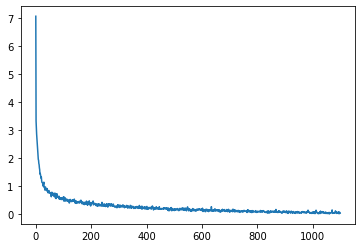

In [10]:
#plot the error history
plt.plot(myModel.loss.error_history)

In [22]:
#validation of the training:

hypothesis_validation = myModel.predict(data["validation"]["X_scaled"])
hypothesis_validation_interpreted = np.argmax(hypothesis_validation, axis=1)
y_validation_interpreted = np.argmax(data["validation"]["y_one_hot"], axis=1)
print("Accuracy: ", (y_validation_interpreted == hypothesis_validation_interpreted).sum()/len(y_validation_interpreted))
print("F-Score : ", f1_score(onehot(y_validation_interpreted), onehot(hypothesis_validation_interpreted)))

Accuracy:  0.9673571428571428
F-Score :  0.9669756918022578


0.9669756918022578